# **LetsGrowMore - Data Science**

**Task 2 :- Stock Market Prediction Using Stacked LSTM**

**Name :- Monil Nareshbhai Contractor**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stock.csv")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data.shape

(2035, 8)

In [4]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:

data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
data.reset_index()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [8]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# **Data Visualization**

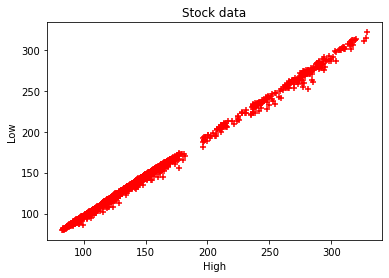

In [9]:
%matplotlib inline
plt.xlabel('High')
plt.ylabel('Low')
plt.title("Stock data")
plt.scatter(data.High,data.Low,color="Red",marker="+")

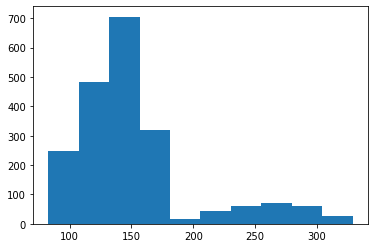

In [10]:
plt.hist(data['High'])
plt.show()

(array([1.564e+03, 3.570e+02, 7.600e+01, 2.200e+01, 9.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   39610. ,  2954750.5,  5869891. ,  8785031.5, 11700172. ,
        14615312.5, 17530453. , 20445593.5, 23360734. , 26275874.5,
        29191015. ]),
 <a list of 10 Patch objects>)

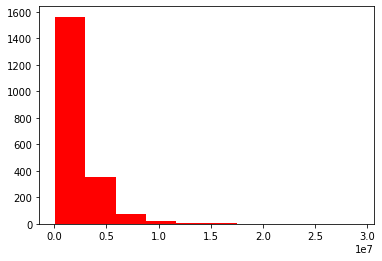

In [11]:
plt.hist(data['Total Trade Quantity'],color = "red")

<function matplotlib.pyplot.show(*args, **kw)>

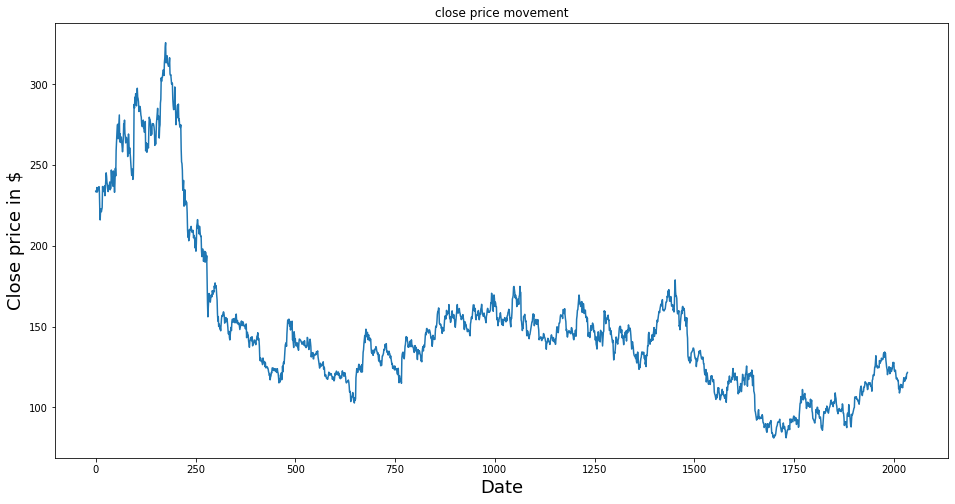

In [12]:
plt.figure(figsize=(16,8))
plt.title("close price movement")
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price in $', fontsize = 18)
plt.show

In [13]:
df = data.filter(['Close'])
dataset = df.values
len(dataset)

2035

In [14]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1425

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [16]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range (70, len(train_data)):
    x_train.append(train_data[i-70:i, 0])
    y_train.append(train_data[i,0])
    if i<= 71:
        print(x_train)
        print(y_train)

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771,
       0.7495915 , 0.76960784, 0.74754902, 0.75428922, 0.76143791,
       0.74979575, 0.73999183, 0.72406046, 0.73488562, 0.76021242])]
[0.7941176470588236]
[array([0.62418301, 0.62214052, 0.6262

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1355, 70, 1)

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x_train,y_train, batch_size = 1, epochs = 1)

1355/1355 [==============================] - 49s 34ms/step - loss: 0.0018


In [21]:
test_data = scaled_data[training_data_size - 70:, :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [22]:
x_test = np.array(x_test)

In [23]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1 ))

In [24]:
prediction = model.predict(x_test)
prediction  = scaler.inverse_transform(prediction)

20/20 [==============================] - 2s 19ms/step


In [25]:
rmse = np.sqrt(np.mean(prediction - y_test)*2)
rmse

2.926825115518167

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


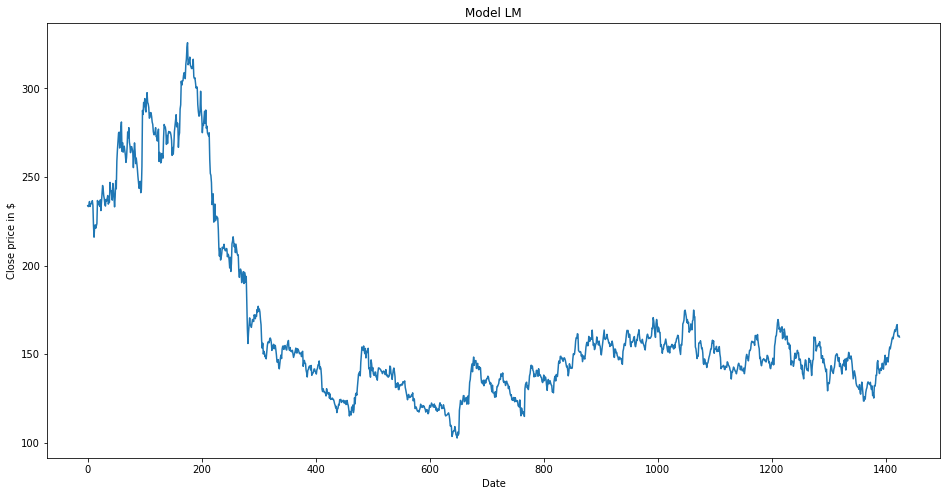

In [26]:

train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title('Model LM')
plt.xlabel('Date')
plt.ylabel('Close price in $')
plt.plot(train['Close'])